### Group 8

Simply run the cells below to plot the fitness overtime of the routes found for the TSP in the text file
Our implementation may be somewhat inefficient, be prepared for long runtimes. Adjust parameters as needed to achieve faster runs.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
distance_dict = {}
route_fitness_dict = {}

def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def fitness(route: np.array, opt=False):
    dist = 0
    for i in range(len(route) - 1):
        # Memory 
        if not (route[i], route[i+1]) in distance_dict:
            distance_dict[(route[i], route[i+1])] = distance(points[route[i]], points[route[i + 1]])

        dist += distance_dict[(route[i], route[i+1])]
            
    # start and end at the same point to simplify crossover
    # Memory
    if not (route[-1], route[0]) in distance_dict:
        distance_dict[(route[-1], route[0])] = distance(points[route[-1]], points[route[0]])
        
    dist += distance_dict[(route[-1], route[0])]
                    
    return 1 / dist, route

def create_population(points, size):
    population = []
    for _ in range(size):
        population.append(np.random.permutation(points.shape[0]))
    return population

def rank(population, opt=False):
    scores = []
    for i, route in enumerate(population):
        
        score, new_route = fitness(route, opt)
        
        population[i] = new_route
        scores.append(score)
    return scores

def select_parents(population, scores):
    pop = np.array(population)
    parents = pop[np.random.choice(np.arange(pop.shape[0]), size=2, p=scores / sum(scores), replace=False),:]
    return parents[0], parents[1]

def crossover(p1, p2, mu=0.1):
    if random.random() > mu:
        return p1
    cut1 = int(random.random() * len(p1))
    cut2 = int(random.random() * len(p2))
    cut1, cut2 = min(cut1, cut2), max(cut1, cut2)

    child = np.zeros_like(p1) - 1
    child[:cut2 - cut1] = p1[cut1:cut2]
    i = 0
    for x in np.append(p2[cut2:], p2[:cut2]):
        if x not in p1[cut1:cut2]:
            child[cut2 - cut1 + i:] = x
            i += 1
    return child

def mutation(route, mu=0.001):
    if random.random() < mu:
        cut1 = int(random.random() * len(route))
        cut2 = int(random.random() * len(route))
        route[cut1], route[cut2] = route[cut2], route[cut1]
    
    return route

# Distance helper function for opt_2
def aux_distance(p1, p2):
    if (p1, p2) not in distance_dict:
        distance_dict[(p1,p2)] = distance(points[p1], points[p2])
    return distance_dict[(p1,p2)]

def opt_2(route):
    N = len(route)
    best_route = route
    best_delta = 0
    for i in range(N - 1):
        for j in range(i + 1, N):
            new_route = route.copy()
            new_route[i] = route[j]
            new_route[j] = route[i]
            ai, ci = (i-1)%N, (i+1)%N
            aj, cj = (j-1)%N, (j+1)%N
            delta =  aux_distance(route[ai], route[i]) + aux_distance(route[i], route[ci]) \
                        + aux_distance(route[aj], route[j]) + aux_distance(route[j], route[cj]) \
                    - (aux_distance(new_route[ai],new_route[i]) + aux_distance(new_route[i],new_route[ci]) \
                        + aux_distance(new_route[aj],new_route[j]) + aux_distance(new_route[j],new_route[cj]))
            
            if delta > best_delta:
                best_route = new_route
                best_delta = delta
                
    return best_route

def main(points, opt=False):
    # Adjust these parameters as desired
    num_gens = 100
    N = 10
    mu_c, mu_m = 0.1, 0.01
    fitnesses = []
    N_steps = 0
    
    population = create_population(points, N)
    
    for g in range(num_gens):
        scores = rank(population, opt)
        
        new_population = []
        while(len(new_population) < N):
            
            parent1, parent2 = select_parents(population, scores)
            
            child = crossover(parent1, parent2, mu_c)
            
            child = mutation(child, mu_m)
            
            if opt:
                child = opt_2(child) 
            
            new_population.append(child)
        population = new_population
        fitnesses.append(1 / max(scores))
            
            
    return fitnesses

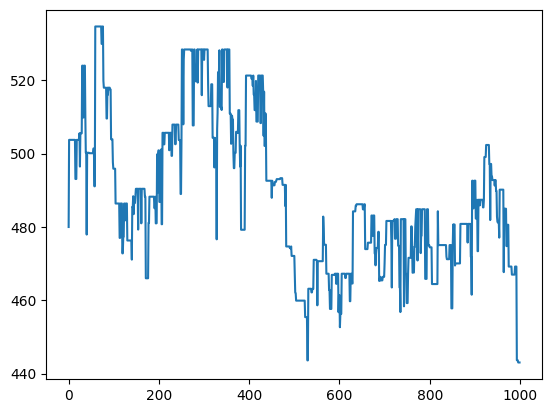

In [3]:
# For running 10 indepenent runs of the GA to find the TSP
# Set opt to false to run without the memetic algorithm (2-opt)
# Isolate main to do a single run

num_points = 50  # int(input("Number of points: "))
filename = "file-tsp.txt"  # input("Path to file: ")
points = np.zeros((num_points, 2))
with open(filename, 'r') as f:
    for i, line in enumerate(f.readlines()):
        x, y = [float(i) for i in line.split()]
        points[i][0] = x
        points[i][1] = y

opt = False
for _ in range(1):
    fitness = main(points, opt)
    plt.plot(fitness)
plt.show()

In [33]:
def AES(opt_2: bool, N: int) -> int:
    


array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])